In [1]:
##link for train set
!wget --no-check-certificate\
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
  -O /tmp/rps.zip

--2020-04-03 06:40:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  60.0MB/s    in 3.2s    

2020-04-03 06:40:43 (60.0 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



In [2]:
#link for test set
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
  -O /tmp/rps-test.zip


--2020-04-03 06:40:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test.zip’

/tmp/rps-test.zip   100%[===================>]  28.15M   116MB/s    in 0.2s    

2020-04-03 06:40:46 (116 MB/s) - ‘/tmp/rps-test.zip’ saved [29516758/29516758]



In [0]:
#to unzip the downloaded zip files
import zipfile
import os

train_path='/tmp/rps.zip'
test_path='/tmp/rps-test.zip'

zip_ref=zipfile.ZipFile(train_path,'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

zip_ref=zipfile.ZipFile(test_path,'r')
zip_ref.extractall('/tmp/')
zip_ref.close()


In [4]:
train_dir='/tmp/rps'     #train dir
test_dir='/tmp/rps-test-set'    #test dir

train_paper_dir='/tmp/rps/paper'
train_rock_dir='/tmp/rps/rock'
train_scissor_dir='/tmp/rps/scissors'

train_paper_names=os.listdir(train_paper_dir)
train_scissor_names=os.listdir(train_scissor_dir)
train_rock_names=os.listdir(train_rock_dir)

print(len(train_paper_names))     #len of paper set
print(len(train_rock_names))      #length of rock set
print(len(train_scissor_names))     #length of scissor set

840
840
840


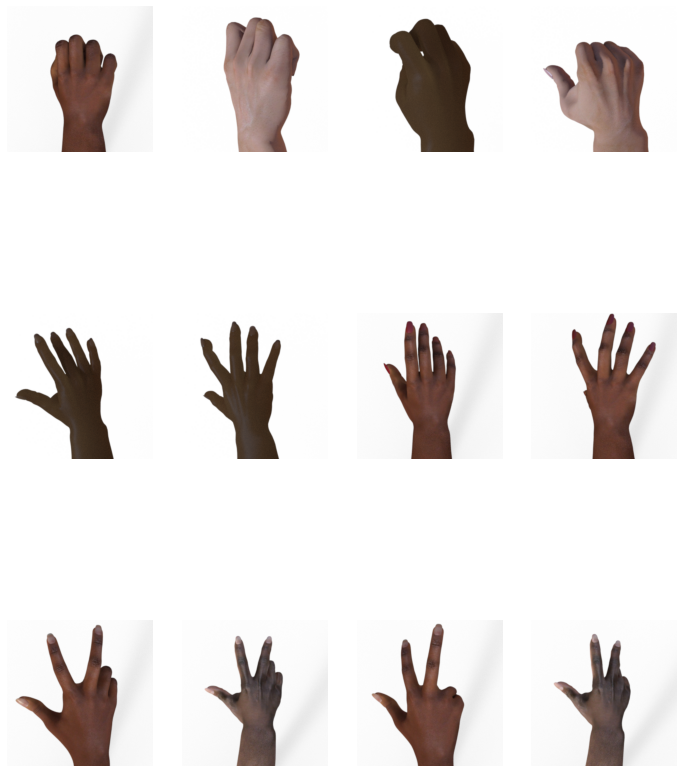

In [5]:

#to plot images of datset
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=3       #set rows and cols
ncols=4

fig=plt.gcf()       #get current figure
fig.set_size_inches(nrows*4,ncols*4)    #set size of the new plot

rock_names=[os.path.join(train_rock_dir,train_rock_names[i])    #list of 4 rock images paths
              for i in range(4)]
paper_names=[os.path.join(train_paper_dir,train_paper_names[i])  #list of 4 paper image paths
              for i in range(4)]          
scissor_names=[os.path.join(train_scissor_dir,train_scissor_names[i])
              for i in range(4)]
combined=rock_names+paper_names+scissor_names                     #combine 3 names of each dataset

for i,toplot in enumerate(combined):    
  sp=plt.subplot(nrows,ncols,i+1)   #subplot 
  sp.axis('off')
  img=mpimg.imread(toplot)      #read images
  plt.imshow(img)


In [0]:
import tensorflow as tf

In [7]:
model=tf.keras.models.Sequential([
                                  #1st convolution
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPool2D((2,2)), #max pool layer (74,74,64)
                                  #2nd convolution
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),  #(72,72,64)
                                  tf.keras.layers.MaxPool2D((2,2)),                  #  (36,36,64)
                                  #3rd convolution
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D((2,2)),
                                  #4th convolution
                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D((2,2)),
                                  #Flatten the layers to feed into DNN
                                  tf.keras.layers.Flatten(),
                                  #add dropout
                                  tf.keras.layers.Dropout(0.5),
                                  #512 hidden layer
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  #output layer
                                  tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()  #summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])   #compile using rms as optimizer and categorical_crossentropy as loss func

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator    #load images using generator

train_gen=ImageDataGenerator(                   #image augmentation
    rescale=1.0/255.0,
    rotation_range=40,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator=train_gen.flow_from_directory(      #train set 
    '/tmp/rps',
    target_size=(150,150),
    class_mode='categorical'
)

test_gen=ImageDataGenerator(
    rescale=1.0/255.0
)

test_generator=test_gen.flow_from_directory(      #test set
    '/tmp/rps-test-set',
    target_size=(150,150),
    class_mode='categorical'
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [10]:
history=model.fit_generator(train_generator,epochs=25,validation_data=test_generator,verbose=1)   #epochs=25



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
     51/Unknown - 12s 232ms/step - loss: 1.2970 - acc: 0.3450

KeyboardInterrupt: ignored

In [0]:
#to plot training accu vs testing acc

acc=history.history['acc']   #train acc
val_acc=history.history['val_acc']  #test_acc
epochs=range(len(acc))                  #epochs
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Testing Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend(loc=0)
plt.show()

In [0]:
from google.colab import files
import numpy as np
from keras.preprocessing import image

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn                           #path of the uploaded file
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)                     #expand [,] to [1,]

  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)       #predict for the new image
  print(fn)                                          #print the predicted classes
  print(classes)



Saving paper1.png to paper1.png
Saving paper2.png to paper2.png
Saving paper3.png to paper3.png
Saving paper4.png to paper4.png
Saving paper5.png to paper5.png
Saving paper6.png to paper6.png
Saving paper7.png to paper7.png
Saving paper8.png to paper8.png
Saving paper9.png to paper9 (2).png
Saving paper-hires1.png to paper-hires1.png
Saving paper-hires2.png to paper-hires2.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5.png
Saving rock6.png to rock6.png
Saving rock7.png to rock7.png
Saving rock8.png to rock8.png
Saving rock9.png to rock9 (1).png
Saving rock-hires1.png to rock-hires1 (1).png
Saving rock-hires2.png to rock-hires2.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2.png
Saving scissors3.png to scissors3.png
Saving scissors4.png to scissors4.png
Saving scissors5.png to scissors5 (1).png
Saving scissors6.png to scissors6.png
Saving scissors7.png to sc